In [1]:
#Required imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas.io.data import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

C:\Users\Girish\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
C:\Users\Girish\Anaconda\lib\site-packages\pandas\io\data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [43]:
# Companies on which I'll be performing stock analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [44]:
# Date Range for consideration while doing analysis
# Providing end date as today's date
end = datetime.now()

# Providing start date as exactly 1 year ago from today's date
start = datetime(end.year-1, end.month, end.day)

In [45]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)
    
# globals help to create dataframe with each element of tech_list and makes it global

In [46]:
GOOG.describe()

,Open,High,Low,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,614.552757,620.190731,608.269067,614.477631,2075849.800797,614.477631
std,82.123934,83.260820,80.654913,82.050746,1072236.504485,82.050746
min,511.002313,511.092313,501.202274,510.002318,527200.000000,510.002318
25%,538.165008,541.116256,534.084701,538.204986,1490950.000000,538.204986
50%,605.590027,612.859985,595.250000,600.700012,1820800.000000,600.700012
75%,666.654998,676.770019,659.290008,669.514984,2238450.000000,669.514984
max,776.599976,779.979980,766.900024,776.599976,11164900.000000,776.599976


In [47]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-01-26,538.532466,539.002444,529.672413,535.212448,1543700,535.212448
2015-01-27,529.972369,530.702398,518.192381,518.632370,1904000,518.632370
2015-01-28,522.782423,522.992349,510.002318,510.002318,1683800,510.002318
2015-01-29,511.002313,511.092313,501.202274,510.662331,4186400,510.662331
2015-01-30,515.862322,539.872444,515.522339,534.522445,5606400,534.522445


In [48]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2015-01-26 to 2016-01-22
Data columns (total 6 columns):
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Volume       251 non-null int64
Adj Close    251 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


### 1.) What was the change in price of the stock over time?

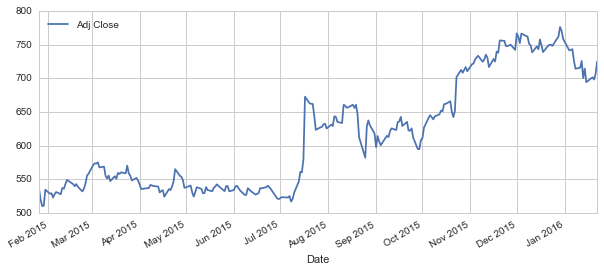

In [49]:
GOOG['Adj Close'].plot(legend = True, figsize =(10,4))

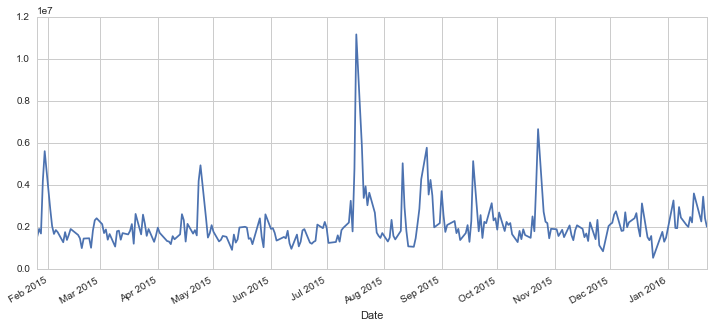

In [50]:
GOOG['Volume'].plot(figsize=(12,5))

### 2.) What was the daily return of the stock on average?

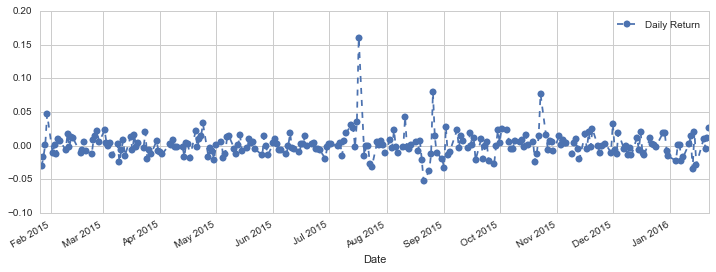

In [51]:
# We'll use pct_change to find the percent change for each day
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
GOOG['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

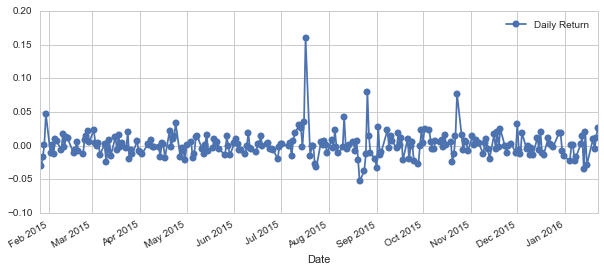

In [52]:
GOOG['Daily Return'].plot(figsize=(10,4),legend = True,marker='o')

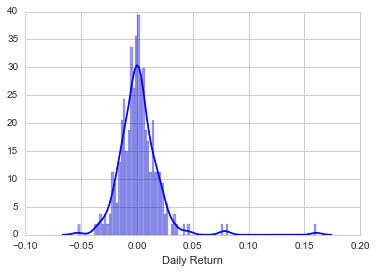

In [53]:
#sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'red', kde=False, hist = True, rug= True)

#sns.distplot(AMZN['Daily Return'].dropna(), bins = 100, color = 'green' hist = False, rug= True)

#sns.distplot(MSFT['Daily Return'].dropna(), bins = 100, color = 'yellow', rug= True)

# distplot will provide kde and hist by default but we can enable rugplot as well using 'rug=True'

sns.distplot(GOOG['Daily Return'].dropna(), bins = 100, color = 'blue')

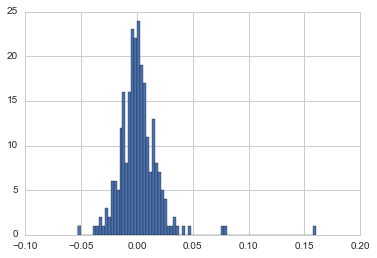

In [54]:
GOOG['Daily Return'].hist(bins = 80)

### 3.) What was the moving average of the various stocks?

In [55]:
# Working with Moving Averages

ma_day=[10,20,30]

for ma in ma_day:
    
    column_name = "MA for %s days" %(str(ma))
    
    GOOG[column_name] = pd.rolling_mean(GOOG['Adj Close'],ma)

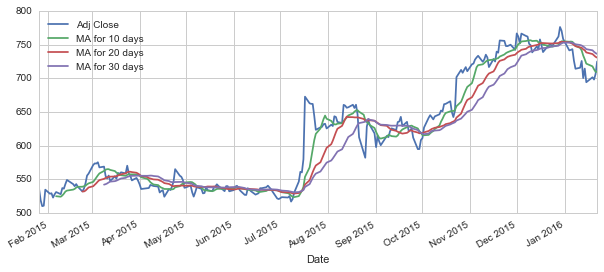

In [56]:
GOOG[['Adj Close','MA for 10 days','MA for 20 days','MA for 30 days']].plot(subplots=False, figsize = (10,4))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000026F24668>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000002739F0B8>], dtype=object)

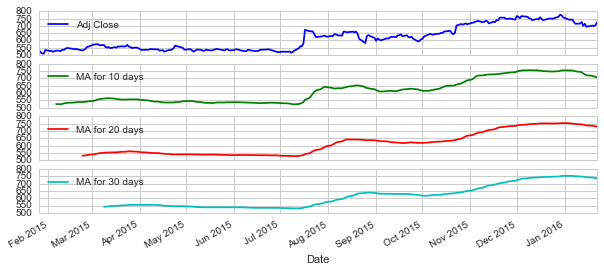

In [57]:
GOOG[['Adj Close','MA for 10 days','MA for 20 days','MA for 30 days']].plot(subplots=True, figsize = (10,4))

### 4.) What was the correlation between different stocks' closing prices?

### 5.) What was the correlation between different stocks' daily returns?

In [58]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [59]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-01-26,111.205246,309.660004,535.212448,45.764130
2015-01-27,107.311588,306.750000,518.632370,41.529416
2015-01-28,113.378221,303.910004,510.002318,40.098373
2015-01-29,116.908082,311.779999,510.662331,40.896641
2015-01-30,115.197234,354.529999,534.522445,39.329313


In [60]:
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-01-26,NaN,NaN,NaN,NaN
2015-01-27,-0.035013,-0.009397,-0.030978,-0.092533
2015-01-28,0.056533,-0.009258,-0.016640,-0.034459
2015-01-29,0.031134,0.025896,0.001294,0.019908
2015-01-30,-0.014634,0.137116,0.046724,-0.038324


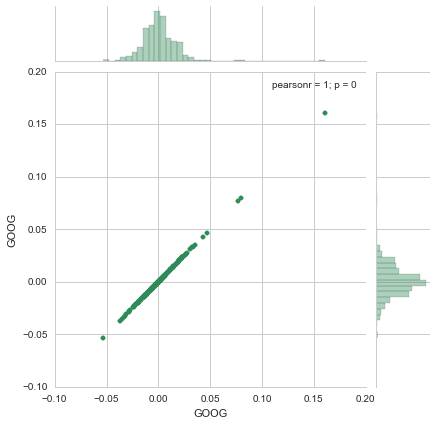

In [61]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter', color='seagreen')

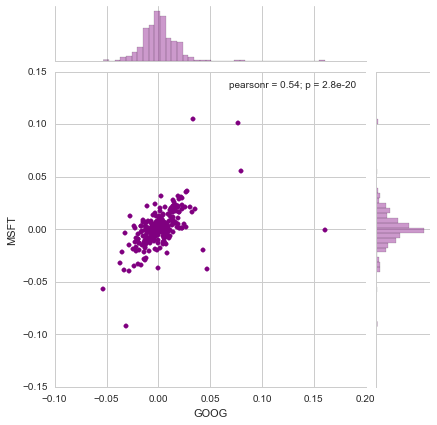

In [62]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter', color='purple')

C:\Users\Girish\Anaconda\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


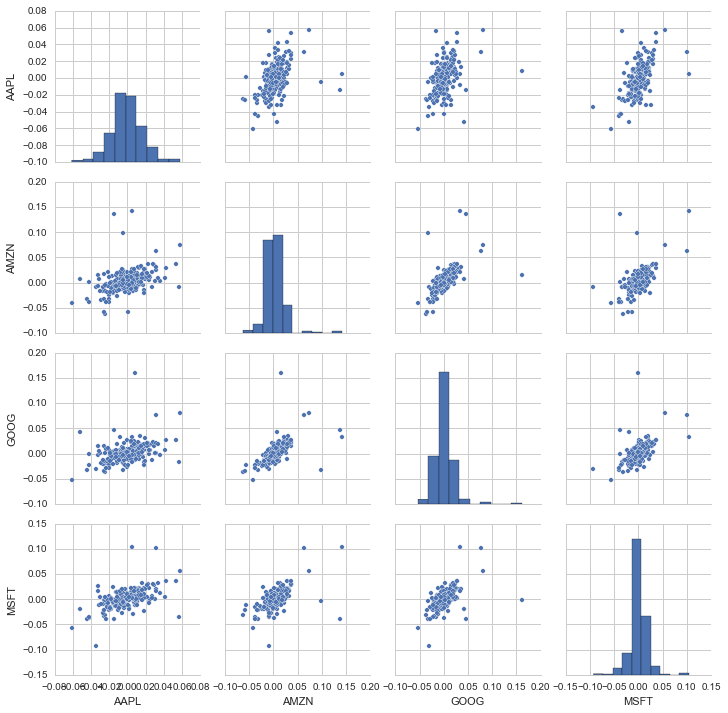

In [63]:
sns.pairplot(tech_rets.dropna())

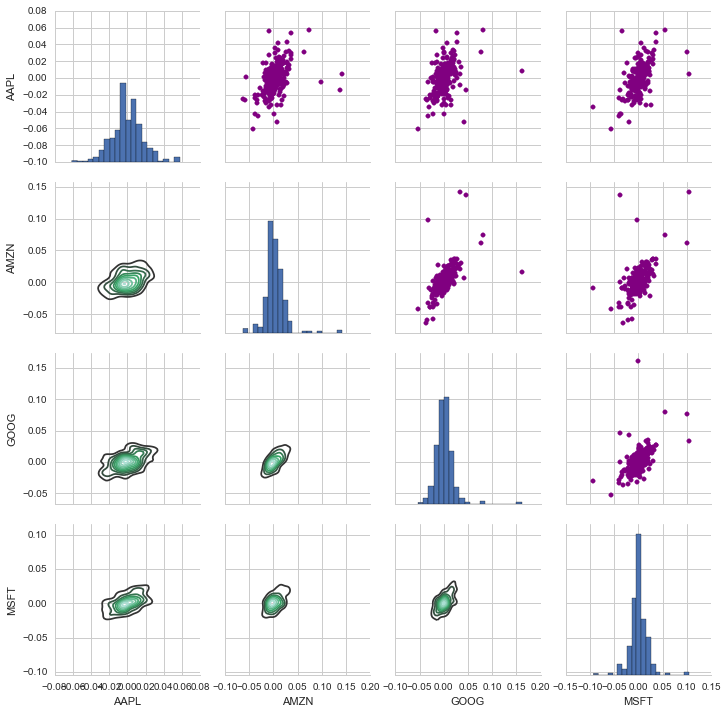

In [64]:
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter, color='purple')

return_fig.map_lower(sns.kdeplot, color = 'seagreen')

return_fig.map_diag(plt.hist, bins=20)

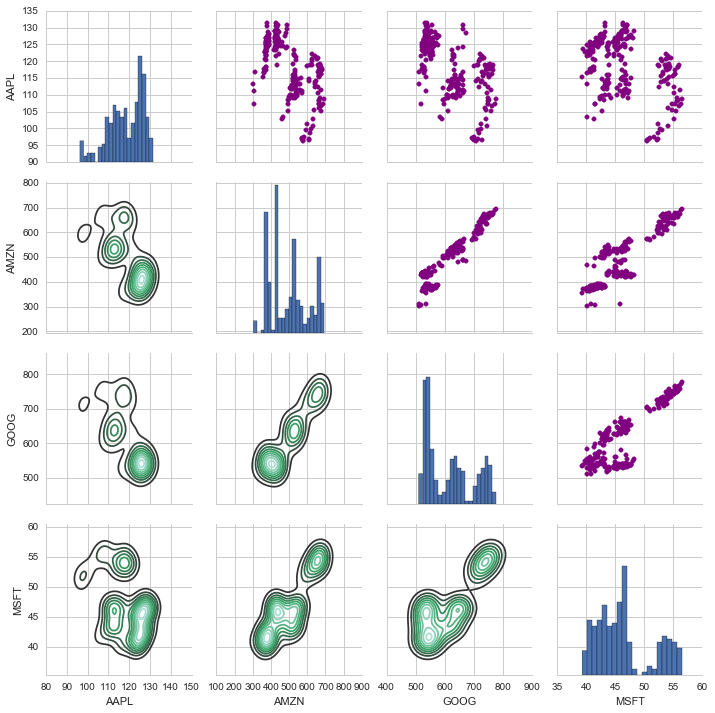

In [65]:
# changing df
return_fig = sns.PairGrid(closing_df)

return_fig.map_upper(plt.scatter, color='purple')

return_fig.map_lower(sns.kdeplot, color = 'seagreen')

return_fig.map_diag(plt.hist, bins=20)

C:\Users\Girish\Anaconda\lib\site-packages\seaborn\linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\Girish\Anaconda\lib\site-packages\seaborn\linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


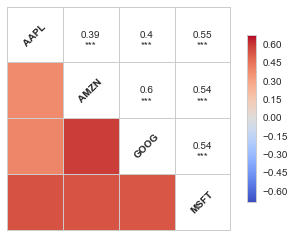

In [66]:
sns.corrplot(tech_rets.dropna(), annot=True)

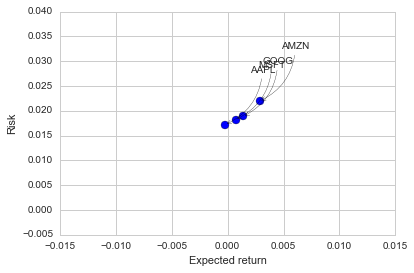

In [67]:
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(), s=area)

plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=-0.3'))

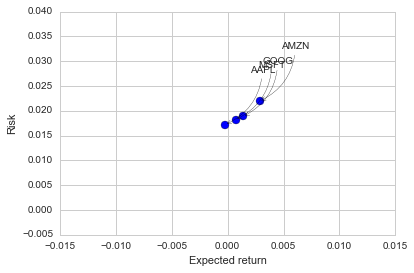

In [68]:
plt.scatter(rets.mean(), rets.std(), s=area)

plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=-0.3'))

In [69]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-01-26,NaN,NaN,NaN,NaN
2015-01-27,-0.035013,-0.009397,-0.030978,-0.092533
2015-01-28,0.056533,-0.009258,-0.016640,-0.034459
2015-01-29,0.031134,0.025896,0.001294,0.019908
2015-01-30,-0.014634,0.137116,0.046724,-0.038324


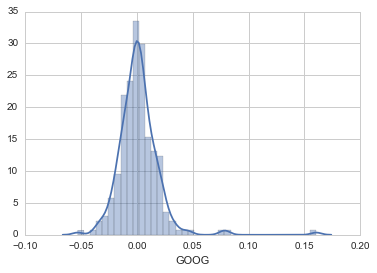

In [73]:
sns.distplot(tech_rets['GOOG'].dropna())

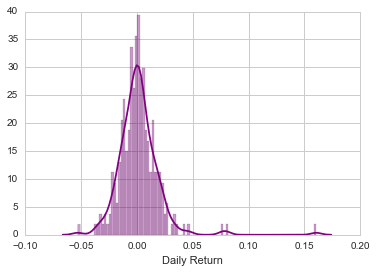

In [72]:
sns.distplot(GOOG['Daily Return'].dropna(),bins=100,color='purple')

### 6.) How much value do we put at risk by investing in a particular stock?

In [74]:
rets['AAPL'].quantile()

-0.00092669728556898923

In [75]:
rets['AAPL'].quantile(0.05)

-0.026645138131374001

The 0.05 empirical quantile of daily returns is at -0.026. That means that with 95% confidence, our worst daily loss will not exceed 2.6%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.026 * 1,000,000 = $26,000.